In [1]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession


# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
df = spark.read.csv('BankChurners.csv', header='true', inferSchema = True)


In [3]:
df.columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit']

In [4]:
print('The total number of columns is:', len(df.columns), '\nThe total number of rows is:', df.count())

The total number of columns is: 13 
The total number of rows is: 10127


In [5]:
df.head()

Row(CLIENTNUM=768805383, Attrition_Flag='Existing Customer', Customer_Age=45, Gender='M', Dependent_count=3, Education_Level='High School', Marital_Status='Married', Income_Category='$60K - $80K', Card_Category='Blue', Months_on_book=39, Months_Inactive_12_mon=1, Contacts_Count_12_mon=3, Credit_Limit=12691.0)

In [6]:
df.show(5)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+----------------------+---------------------+------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|
+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+----------------------+---------------------+------------+
|768805383|Existing Customer|          45|     M|              3|    High School|       Married|    $60K - $80K|         Blue|            39|                     1|                    3|     12691.0|
|818770008|Existing Customer|          49|     F|              5|       Graduate|        Single| Less than $40K|         Blue|            44|                     1|                    2|      8256.0|


In [9]:
#Creating temporary table

df.createOrReplaceTempView('BankChurners')
# Manera de crear una consulta con sql comun
spark.sql(
    '''
    Select Attrition_Flag,Customer_Age,Gender,Dependent_count FROM BankChurners LIMIT 10
    '''
).show()

+-----------------+------------+------+---------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|
+-----------------+------------+------+---------------+
|Existing Customer|          45|     M|              3|
|Existing Customer|          49|     F|              5|
|Existing Customer|          51|     M|              3|
|Existing Customer|          40|     F|              4|
|Existing Customer|          40|     M|              3|
|Existing Customer|          44|     M|              2|
|Existing Customer|          51|     M|              4|
|Existing Customer|          32|     M|              0|
|Existing Customer|          37|     M|              3|
|Existing Customer|          48|     M|              2|
+-----------------+------------+------+---------------+



In [10]:
# Otra forma de generar una consulta con el metodo select
df.select('Attrition_Flag','Customer_Age','Gender','Dependent_count').show(10)

+-----------------+------------+------+---------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|
+-----------------+------------+------+---------------+
|Existing Customer|          45|     M|              3|
|Existing Customer|          49|     F|              5|
|Existing Customer|          51|     M|              3|
|Existing Customer|          40|     F|              4|
|Existing Customer|          40|     M|              3|
|Existing Customer|          44|     M|              2|
|Existing Customer|          51|     M|              4|
|Existing Customer|          32|     M|              0|
|Existing Customer|          37|     M|              3|
|Existing Customer|          48|     M|              2|
+-----------------+------------+------+---------------+
only showing top 10 rows



In [11]:
spark.sql(
    '''
    SELECT Attrition_Flag,Customer_Age,Gender,Dependent_count 
    FROM BankChurners
    WHERE Marital_Status = 'Married'
    '''
).show()
    

+-----------------+------------+------+---------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|
+-----------------+------------+------+---------------+
|Existing Customer|          45|     M|              3|
|Existing Customer|          51|     M|              3|
|Existing Customer|          40|     M|              3|
|Existing Customer|          44|     M|              2|
|Existing Customer|          51|     M|              4|
|Existing Customer|          65|     M|              1|
|Existing Customer|          57|     F|              2|
|Existing Customer|          41|     M|              3|
|Existing Customer|          61|     M|              1|
|Existing Customer|          45|     F|              2|
|Attrited Customer|          62|     F|              0|
|Existing Customer|          41|     M|              3|
|Existing Customer|          54|     M|              2|
|Existing Customer|          63|     M|              1|
|Existing Customer|          47|     M|         

In [12]:
df.select('Attrition_Flag','Customer_Age','Gender','Dependent_count').filter(df['Marital_Status'] == 'Married').show(20)

+-----------------+------------+------+---------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|
+-----------------+------------+------+---------------+
|Existing Customer|          45|     M|              3|
|Existing Customer|          51|     M|              3|
|Existing Customer|          40|     M|              3|
|Existing Customer|          44|     M|              2|
|Existing Customer|          51|     M|              4|
|Existing Customer|          65|     M|              1|
|Existing Customer|          57|     F|              2|
|Existing Customer|          41|     M|              3|
|Existing Customer|          61|     M|              1|
|Existing Customer|          45|     F|              2|
|Attrited Customer|          62|     F|              0|
|Existing Customer|          41|     M|              3|
|Existing Customer|          54|     M|              2|
|Existing Customer|          63|     M|              1|
|Existing Customer|          47|     M|         

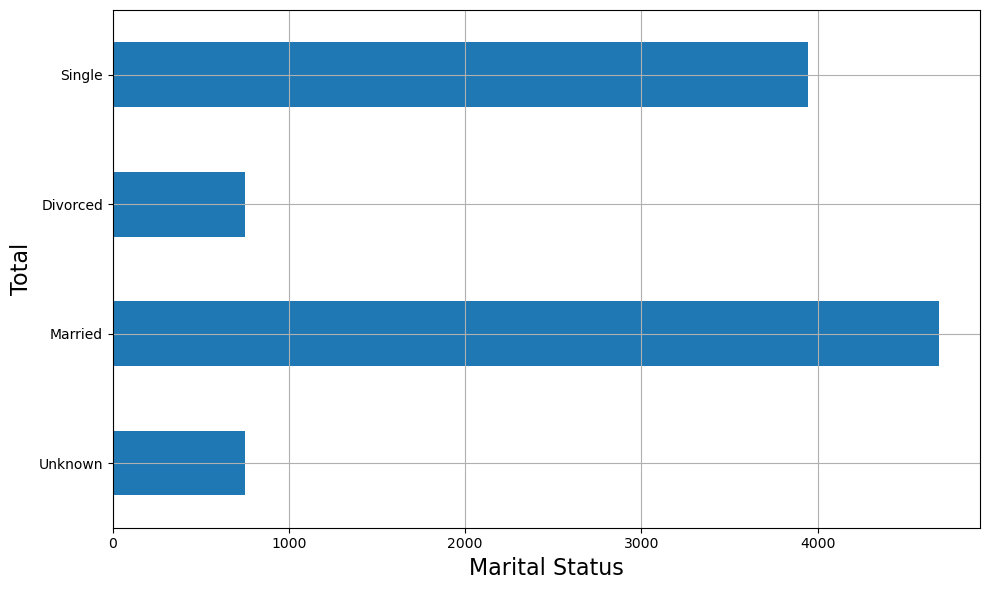

In [13]:
plot_df = spark.sql(
    '''
    SELECT Marital_Status, count(*) as Total
    FROM BankChurners
    GROUP BY Marital_Status
    ''').toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Marital_Status', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Marital Status', size = 16)
ax.set_ylabel('Total', size = 16)
plt.grid()
plt.tight_layout()
plt.show()

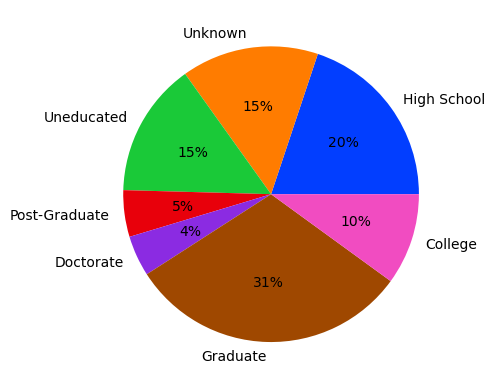

In [14]:
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
    '''
    SELECT Education_Level, count(*) as Total
    FROM BankChurners
    GROUP BY Education_Level
    '''
).toPandas()

palette_color = sns.color_palette('bright')

plt.pie(plot_df2['Total'], labels=plot_df2['Education_Level'], colors=palette_color, autopct='%.0f%%')
plt.show()

In [16]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

In [17]:
numeric_variables = ['Customer_Age','Dependent_count','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit']
# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_variables, outputCol=vector_col)
df_vector = assembler.transform(df.select(numeric_variables)).select(vector_col)
matrix = Correlation.corr(df_vector, vector_col)
matrix = Correlation.corr(df_vector, 'corr_features').collect()[0][0] 
corr_matrix = matrix.toArray().tolist() 
corr_matrix_df = pd.DataFrame(data=corr_matrix, columns = numeric_variables, index=[numeric_variables]) 
corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_409/3973971414.py:10: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(2)


,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
Customer_Age,1.00,-0.12,0.79,0.05,-0.02,0.00
Dependent_count,-0.12,1.00,-0.10,-0.01,-0.04,0.07
Months_on_book,0.79,-0.10,1.00,0.07,-0.01,0.01
Months_Inactive_12_mon,0.05,-0.01,0.07,1.00,0.03,-0.02
Contacts_Count_12_mon,-0.02,-0.04,-0.01,0.03,1.00,0.02
Credit_Limit,0.00,0.07,0.01,-0.02,0.02,1.00
